<a href="https://colab.research.google.com/github/anupamamnair/iiitk/blob/main/MLAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a Support Vector Machine (SVM) classifier in Python to predict passenger survival on the Titanic dataset. The target variable is Survived (0 = did not survive, 1 = survived).

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("https://raw.githubusercontent.com/anupamamnair/iiitk/main/titanic.csv")
print("Initial data shape:", df.shape)
print(df.head())

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
df = df[features + [target]]

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Features and target
X = df.drop(target, axis=1)
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    print(f"\n===== Training SVM with {kernel.upper()} kernel =====")
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Evaluate performance
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[kernel] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    }

    print(f"\nClassification Report for {kernel.upper()} Kernel:")
    print(classification_report(y_test, y_pred))

print("\n=== Model Performance Comparison ===")
results_df = pd.DataFrame(results).T
print(results_df)


Initial data shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

Implement a Support Vector Machine (SVM) classifier in Python to predict whether a person earns more than $50K per year using the Adult Income dataset (also known as Census Income dataset).

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("https://raw.githubusercontent.com/anupamamnair/iiitk/main/adult.csv")
print("Initial data shape:", df.shape)
print(df.head())

# Data Preprocessing
# Replace '?' with NaN and drop missing rows
df = df.replace('?', np.nan).dropna()

# Encode categorical variables using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    print(f"\n===== Training SVM with {kernel.upper()} kernel =====")
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[kernel] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    }

    print(f"\nClassification Report for {kernel.upper()} Kernel:")
    print(classification_report(y_test, y_pred))

print("\n=== Model Performance Comparison ===")
results_df = pd.DataFrame(results).T
print(results_df)


Initial data shape: (32561, 15)
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          435

Implement a Support Vector Machine (SVM) classifier in Python to predict whether a person is likely to suffer a stroke using the Stroke Prediction dataset. The target variable is stroke (0 = No, 1 = Yes).

Initial data shape: (5110, 12)
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

===== Training SVM with 

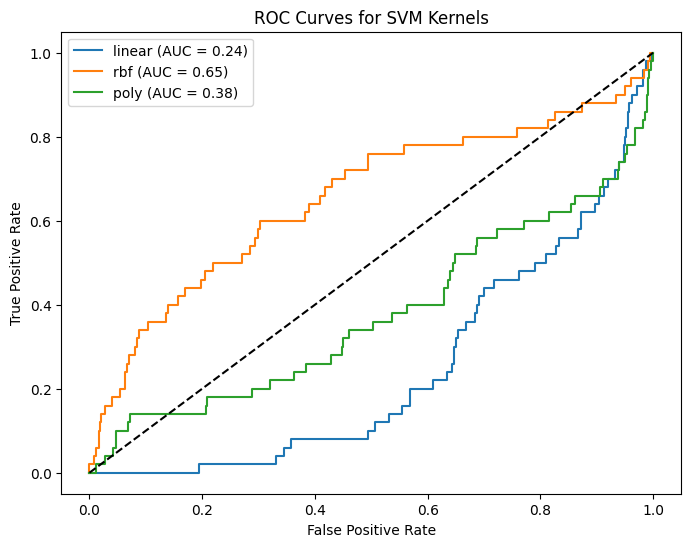

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/anupamamnair/iiitk/main/healthcare-dataset-stroke-data.csv')
print("Initial data shape:", df.shape)
print(df.head())

# Drop irrelevant columns
df = df.drop(columns=['id'])  # 'id' is irrelevant

# Preprocess the data
# Handle missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Normalize numerical features
scaler = StandardScaler()
num_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X[num_features] = scaler.fit_transform(X[num_features])

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM classifier with different kernels
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    print(f"\n===== Training SVM with {kernel.upper()} kernel =====")
    clf = SVC(kernel=kernel, probability=True, class_weight='balanced', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[kernel] = {'accuracy': acc, 'confusion_matrix': cm, 'classification_report': cr, 'roc_auc': roc_auc}

for k, v in results.items():
    print(f"\nSVM with {k} kernel")
    print("Accuracy:", v['accuracy'])
    print("Confusion Matrix:\n", v['confusion_matrix'])
    print("Classification Report:\n", v['classification_report'])
    print("ROC-AUC Score:", v['roc_auc'])

#Plot ROC curves
plt.figure(figsize=(8,6))
for kernel in kernels:
    clf = SVC(kernel=kernel, probability=True, random_state=42)
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM Kernels')
plt.legend()
plt.show()


Implement a Naive Bayes classifier in Python to predict loan approval using the Loan Prediction dataset. The target variable is Loan_Status.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

df = pd.read_csv('https://raw.githubusercontent.com/anupamamnair/iiitk/main/loan_status.csv')
print("Initial data shape:", df.shape)
print(df.head())

# Drop irrelevant columns
df.drop(columns=['Loan_ID'], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Normalize numerical features
scaler = StandardScaler()
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = scaler.fit_transform(
    X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate performance
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


# Initialize and train SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
print("SVM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))



Initial data shape: (614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural     

Implement a Naive Bayes classifier in Python to predict whether a customer will subscribe to a term deposit based on demographic, financial, and campaign-related attributes using the Bank Marketing dataset

Initial data shape: (11162, 17)
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
Naive Bayes Classifier
Accuracy: 0.754590237348858
Confusion Matrix

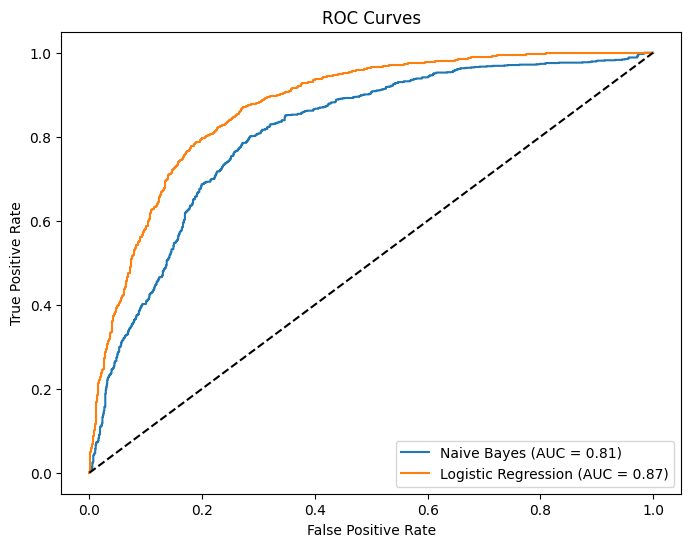

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/anupamamnair/iiitk/main/bank.csv')
print("Initial data shape:", df.shape)
print(df.head())

target_col = 'deposit'

# Preprocess the data
# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Encode target
df[target_col] = le.fit_transform(df[target_col])

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Normalize numerical features if required
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:,1]

# Evaluate Naive Bayes
print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nb))

# Train Logistic Regression for comparison
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

# Evaluate Logistic Regression
print("Logistic Regression Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

# Plot ROC curves
plt.figure(figsize=(8,6))
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_prob_nb):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


Implement a Naive Bayes classifier in Python to predict whether an employee will leave the company based on job satisfaction, work environment, and personal attributes. The target variable is Attrition (Yes / No).

Initial data shape: (1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

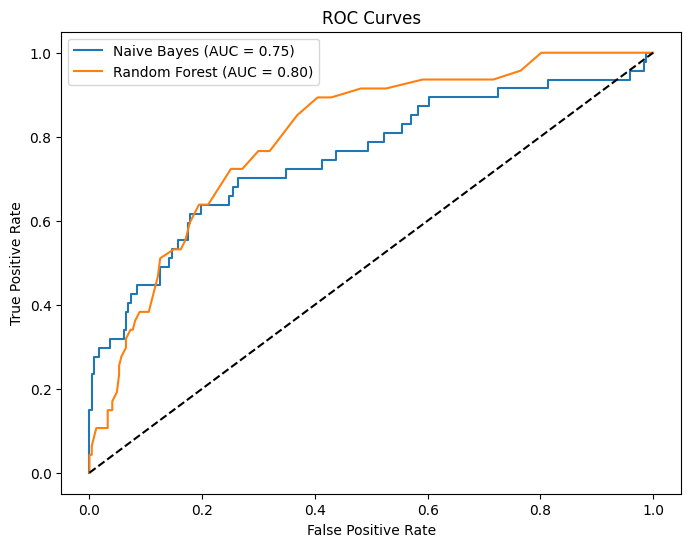

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/anupamamnair/iiitk/main/empAttrition.csv')
print("Initial data shape:", df.shape)
print(df.head())

print(df['Attrition'].value_counts())  # Target variable

# Preprocess data
target_col = 'Attrition'

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
cat_cols = [col for col in cat_cols if col != target_col]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Encode target
df[target_col] = le.fit_transform(df[target_col])

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Normalize numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:,1]

# Train Random Forest for comparison
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_prob))
    print("\n")

# Evaluate models
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_prob_nb):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()
